In [1]:
#!pip install pandas # Using Jupyter Notebook in Vbox
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("datasets_2358_3966_nyc-east-river-bicycle-counts.csv", sep = ',')
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


# Cleaning the Dataframe

In [3]:
#Fix Precipitation Values
remove_parenthesis = lambda item: re.sub(r'([A-Za-z0-9.]*)( \([\w\d]*\))', r'\1', str(item))
df['Precipitation'] = df['Precipitation'].apply(remove_parenthesis)

remove_T = lambda item: re.sub(r'T', '0', str(item))
df['Precipitation'] = df['Precipitation'].apply(remove_T)

# Convert data to floats
df["High Temp (°F)"] = df["High Temp (°F)"].astype(float)
df["Low Temp (°F)"] = df["Low Temp (°F)"].astype(float)
df["Precipitation"] = df["Precipitation"].astype(float)
df["Brooklyn Bridge"] = df["Brooklyn Bridge"].astype(float)
df["Manhattan Bridge"] = df["Manhattan Bridge"].astype(float)
df["Williamsburg Bridge"] = df["Williamsburg Bridge"].astype(float)
df["Queensboro Bridge"] = df["Queensboro Bridge"].astype(float)
df["Total"] = df["Total"].astype(float)

#Remove time from Date and Day columns
remove_time = lambda item: re.sub(r'([0-9-]+)([ 0-9:]*)', r'\1', str(item))
df['Date'] = df['Date'].apply(remove_time)
df['Day'] = df['Day'].apply(remove_time)

#Drop Unnamed: 0 Column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
def normalize_data(values):
    mean = []
    std = []
    
    column = []
    for col in df.columns:
        if(col == 'Date' or col == 'Day'):
            continue
        else:
            column.append(col)
            
    
    for col in column:
        values = df[col].tolist()
        mean.append(np.mean(values))
        std.append(np.std(values))
        
    norm_values = []
    for row in df.index:
        
        for col in range(len(column)):
            value = df.loc[row, column[col]]
            norm = (value - mean[col]) / std[col]
            df.loc[row, column[col]] = norm
    
    return mean, std, df

# Question 1

## Andrea Renee Levenson

# Question 2

## Nikita Ravi

In [5]:
# Normalize the data
(mean, std, df_norm) = normalize_data(df)

df_norm.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,2016-04-01,1.570376,2.061734,-0.415421,-0.577826,-0.543042,-0.413030,-0.730295,-0.546716
1,2016-04-02,2016-04-02,-0.500154,0.261752,0.958412,-1.473731,-1.413288,-1.269518,-1.339432,-1.370166
2,2016-04-03,2016-04-03,-1.853617,-1.306653,0.369627,-1.781219,-1.656722,-1.750257,-1.866499,-1.759482
3,2016-04-04,2016-04-04,-1.477157,-1.401389,4.098603,-1.786327,-1.753743,-1.891163,-1.865587,-1.835797
4,2016-04-05,2016-04-05,-1.656424,-2.138224,-0.513552,-0.872034,-0.842336,-0.984391,-0.908112,-0.911374


In [6]:
#Data Analysis to verify Features
def plot_graphs(df, columns):
    colors = ['blue', 'green', 'red', 'black']
    
    for i in range(len(columns)):
        df.plot(kind = 'scatter', x = columns[i], y = 'Total', color = colors[i], label = columns[i])
            
    plt.show()

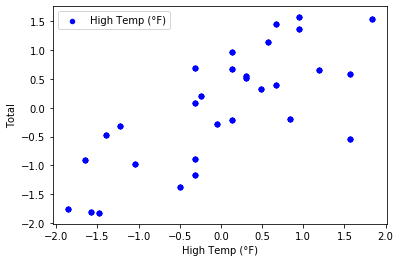

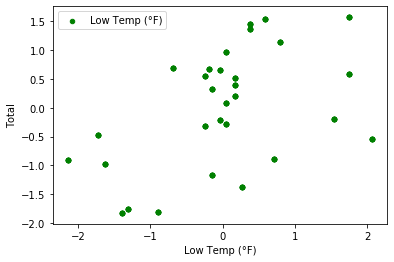

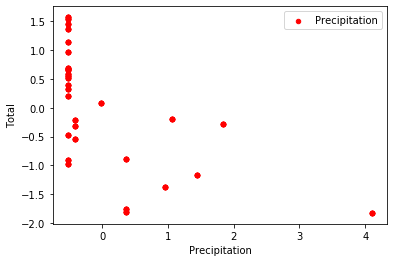

In [7]:
plot_graphs(df_norm, ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation'])

In [8]:
#Get necessary x_columns and y_columns
x_values = df_norm[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']].values
y_values = df_norm[['Total']].values

In [9]:
# Split x_values and y_values into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 42)

### Linear Model

In [10]:
#Linear Model
def linear_model(x_train, x_test, y_train, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    coeff = model.coef_
    intercept = model.intercept_
    
    yHat = model.predict(x_test)
    mse = np.mean((yHat - y_test) ** 2)
    r2 = r2_score(y_test, yHat)
    
    return yHat, coeff, intercept, mse, r2

In [11]:
(yHat, coeff, intercept, mse, r2) = linear_model(x_train, x_test, y_train, y_test)

print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)

Mean Squared Error is 0.43
R2 score is 0.45


### Polynomial Model

In [12]:
def polynomial_model(x_train, x_test, y_train, y_test, d):
    poly = PolynomialFeatures(degree = d)
    poly_x_train = poly.fit_transform(x_train)
    
    model = LinearRegression()
    model.fit(poly_x_train, y_train)
    
    coeff = model.coef_
    intercept = model.intercept_
    
    poly_x_test = poly.fit_transform(x_test)
    yHat = model.predict(poly_x_test)
    
    mse = np.mean((yHat - y_test) ** 2)
    r2 = r2_score(y_test, yHat)
    
    return yHat, coeff, intercept, mse, r2

In [13]:
# Quadratic Model
yHat, coeff, intercept, mse, r2 = polynomial_model(x_train, x_test, y_train, y_test, 2)

In [14]:
print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)

Mean Squared Error is 0.26
R2 score is 0.67


In [15]:
# Cubic Model
yHat, coeff, intercept, mse, r2 = polynomial_model(x_train, x_test, y_train, y_test, 3)

In [16]:
print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)

Mean Squared Error is 0.06
R2 score is 0.93


### Ridge Model

In [17]:
def ridge_model(x_train, x_test, y_train, y_test, d):
    lambda_values = np.logspace(start=-1.00, stop=2.00, endpoint=True, base=10, num=100)
    
    if(d > 1):
        poly = PolynomialFeatures(degree = d)
        x_train = poly.fit_transform(x_train)
        x_test = poly.fit_transform(x_test)
    
    model_list = []
    r2_values = []
    
    for l in lambda_values:
        model = Ridge(alpha = l, fit_intercept = True)
        model.fit(x_train, y_train)
        
        coeff = model.coef_
        intercept = model.intercept_
                
        yHat = model.predict(x_test)
        r2 = r2_score(y_test, yHat)
        
        model_list.append(model)
        r2_values.append(r2)
        
    max_ind = r2_values.index(max(r2_values))
    best_lambda = lambda_values[max_ind]
    best_r2 = r2_values[max_ind]
    best_model = model_list[max_ind]
    
    yHat = best_model.predict(x_test)
    mse = np.mean((yHat - y_test) ** 2)

    
    plt.plot(lambda_values, r2_values, 'r-')
    plt.xlabel("Lambda Values")
    plt.ylabel("R2 Value")
    plt.title("Plot of R2 score against lambda values")
    plt.show()
    
    return r2, mse, best_lambda

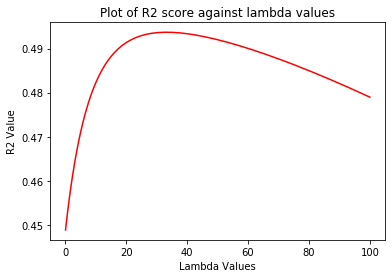

Mean Squared Error is 0.39
R2 score is 0.48
Best Lambda is 32.75


In [18]:
# For Linear Ridge Regression
(r2, mse, best_lambda) = ridge_model(x_train, x_test, y_train, y_test, 1)
print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)
print("Best Lambda is %.2f" % best_lambda)

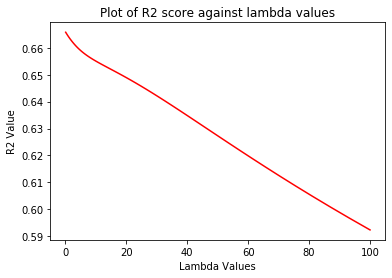

Mean Squared Error is 0.26
R2 score is 0.59
Best Lambda is 0.10


In [19]:
# For Quadratic Ridge Regression
(r2, mse, best_lambda) = ridge_model(x_train, x_test, y_train, y_test, 2)
print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)
print("Best Lambda is %.2f" % best_lambda)

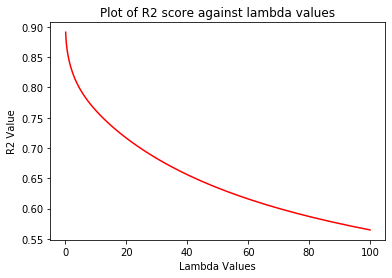

Mean Squared Error is 0.08
R2 score is 0.56
Best Lambda is 0.10


In [20]:
# For Cubic Ridge Regression
(r2, mse, best_lambda) = ridge_model(x_train, x_test, y_train, y_test, 3)
print("Mean Squared Error is %.2f" % mse)
print("R2 score is %.2f" % r2)
print("Best Lambda is %.2f" % best_lambda)

# Question 3

## Andrea Renee Levenson and Nikita Ravi